<a href="https://colab.research.google.com/github/stymgupta/K-Means_Clustering/blob/main/Minor3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

## **Reading the Dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
#Number of Rows and Columns
df.shape

(22, 3)

In [5]:
#information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [6]:
#Descripsion of Datasets
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [7]:
df.isnull().sum() #for null value

Name         0
Age          0
Income($)    0
dtype: int64

## **Visualization of Dataset**

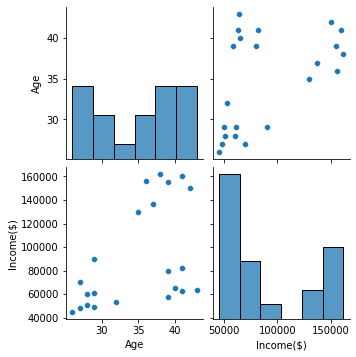

In [10]:
sns.pairplot(df);

## **Correlation Matrix**

In [11]:
df.corr()

,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


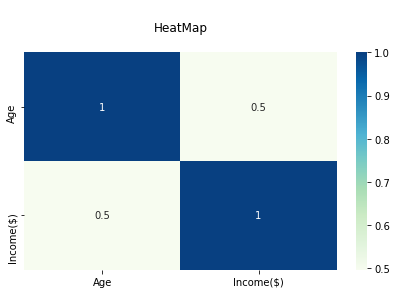

In [14]:
#Constructing Heatmap to understanding Correlation
plt.figure(figsize= (7,4))
plt.title("\nHeatMap\n")
sns.heatmap(abs(df.corr()), cmap='GnBu', annot=True);

## **K-Means Clustering**

For Optimal Solution, Elbow method implemented

In [18]:
x = df.iloc[:,[1,2]]
wcss=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_jobs= -1)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

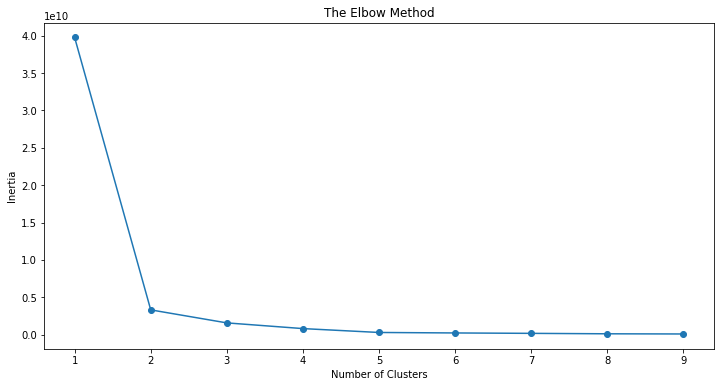

In [20]:
#Ploting the Elbow Method
dff = pd.DataFrame({'Cluster':range(1,10), 'wcss':wcss})
plt.figure(figsize=(12,6))
plt.plot(dff['Cluster'], dff['wcss'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.title("The Elbow Method")

## **Training the K-Means Clustering Model**

In [38]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_jobs= -1)
kmeans.fit(x)
kmeans.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.32000000e+01, 6.26333333e+04]])

In [39]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [40]:
df['cluster']=kmeans.labels_
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [41]:
display(df['cluster'].value_counts())

1    15
0     7
Name: cluster, dtype: int64

## **Plotting Scatter Chart**

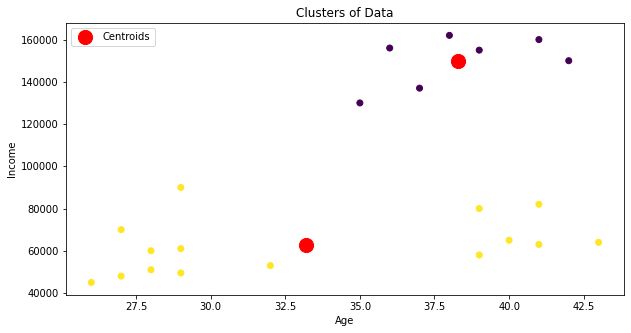

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(df['Age'], df['Income($)'], c=df.cluster)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label="Centroids")
plt.title("Clusters of Data")
plt.xlabel('Age', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.legend()

## **Conclusion**

The Optimal solution for the given dataset is 2.